# Duffing System Phase Plane and Stability Analysis 

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp, DOP853
from typing import List

In [9]:
# System ODE
def duff1(t, x, mu):
    return [x[1], -2*mu*x[1] - x[0] - x[0]**3]

def duff2(t, x, mu):
    return [x[1], -2*mu*x[1] - x[0] + x[0]**3]

def duff3(t, x, mu):
    return [x[1], -2*mu*x[1] + x[0] - x[0]**3]

def duff4(t, x, mu):
    return [x[1], -2*mu*x[1] + x[0] + x[0]**3]

def solve_diffeq(func, t, tspan, ic, parameters={}, algorithm='DOP853', stepsize=np.inf):
    return solve_ivp(fun=func, t_span=tspan, t_eval=t, y0=ic, method=algorithm, 
                     args=tuple(parameters.values()), atol=1e-8, rtol=1e-5, max_step=stepsize)

def phasePlane(x1, x2, func, params):
    X1, X2 = np.meshgrid(x1, x2)  # create grid
    u, v = np.zeros(X1.shape), np.zeros(X2.shape)
    NI, NJ = X1.shape
    for i in range(NI):
        for j in range(NJ):
            x = X1[i, j]
            y = X2[i, j]
            dx = func(0, (x, y), *params.values())  # compute values on grid
            u[i, j] = dx[0]
            v[i, j] = dx[1]
    M = np.hypot(u, v)
    u /= M
    v /= M
    return X1, X2, u, v, M

def DEplot(sys: object, tspan: tuple, x0: List[List[float]], 
           x: np.ndarray, y: np.ndarray, params: dict):
    if len(tspan) != 3:
        raise Exception('tspan should be tuple of size 3: (min, max, number of points).')
    # Set up the figure the way we want it to look
    plt.figure(figsize=(12, 9))

    X1, X2, dx1, dx2, M = phasePlane(
        x, y, sys, params
    )

    # Quiver plot
    plt.quiver(X1, X2, dx1, dx2, M, scale=None, pivot='mid')
    plt.grid()
    
    t1 = np.linspace(0, tspan[0], tspan[2])
    t2 = np.linspace(0, tspan[1], tspan[2])
    if min(tspan) < 0:
        t_span1 = (np.max(t1), np.min(t1))
    else:
        t_span1 = (np.min(t1), np.max(t1))
    t_span2 = (np.min(t2), np.max(t2))
    for x0i in x0:
        sol1 = solve_diffeq(sys, t1, t_span1, x0i, params)
        plt.plot(sol1.y[0, :], sol1.y[1, :], '-r')
        sol2 = solve_diffeq(sys, t2, t_span2, x0i, params)
        plt.plot(sol2.y[0, :], sol2.y[1, :], '-r')

    plt.xlim([np.min(x), np.max(x)])
    plt.ylim([np.min(y), np.max(y)])
    plt.show()

### (a)

\begin{align*}
    \begin{cases}
        \dot{x_1} &= x_2 \\
        \dot{x_2} &= -2\mu x_2 - x_1 - x_1^3
    \end{cases}
\end{align*}

Fixed Point (0, 0)

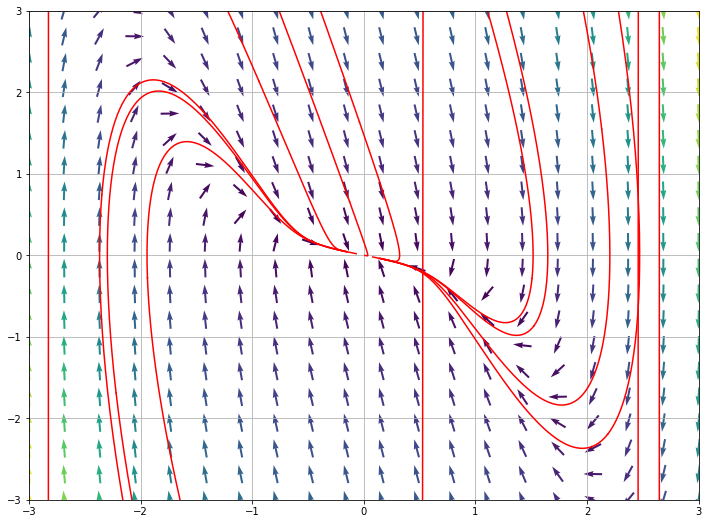

In [23]:
# mu > 1
# A stable node

x0 = np.random.uniform(-2.5, 2.5, (10, 2))

p = {'mu': 2}

x1 = np.linspace(-3, 3, 20)
x2 = np.linspace(-3, 3, 20)

DEplot(duff1, (-6, 6, 1000), x0, x1, x2, p)

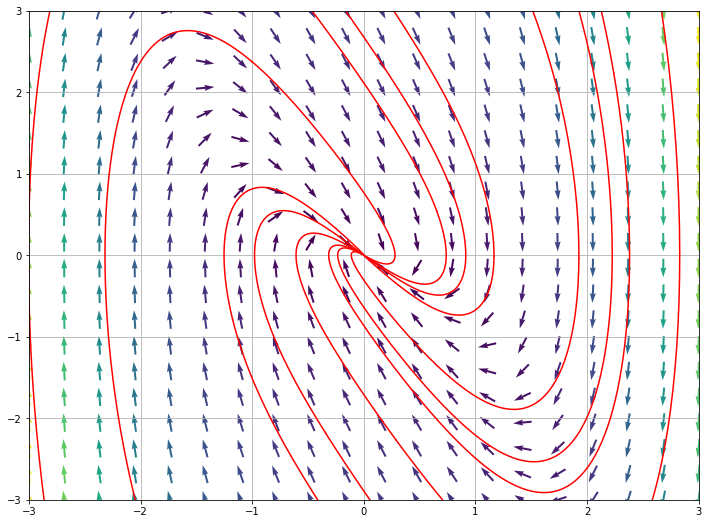

In [24]:
# mu = 1
# A stable singular node 

x0 = np.random.uniform(-2.5, 2.5, (10, 2))

p = {'mu': 1}

x1 = np.linspace(-3, 3, 20)
x2 = np.linspace(-3, 3, 20)

DEplot(duff1, (-6, 6, 1000), x0, x1, x2, p)

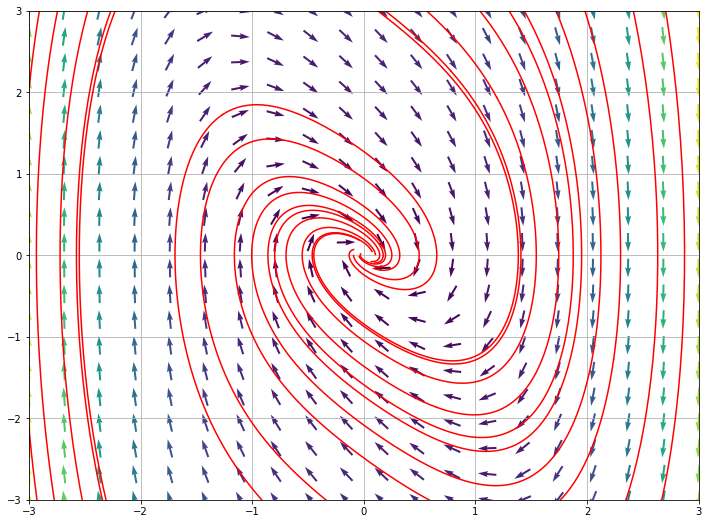

In [25]:
# 0 < mu < 1
# A stable spiral/focus

x0 = np.random.uniform(-2.5, 2.5, (10, 2))

p = {'mu': 0.5}

x1 = np.linspace(-3, 3, 20)
x2 = np.linspace(-3, 3, 20)

DEplot(duff1, (-6, 6, 1000), x0, x1, x2, p)

### (b)

\begin{align*}
    \begin{cases}
        \dot{x_1} &= x_2 \\
        \dot{x_2} &= -2\mu x_2 - x_1 + x_1^3
    \end{cases}
\end{align*}

Fixed Point (-1, 0), (0, 0), (1, 0)

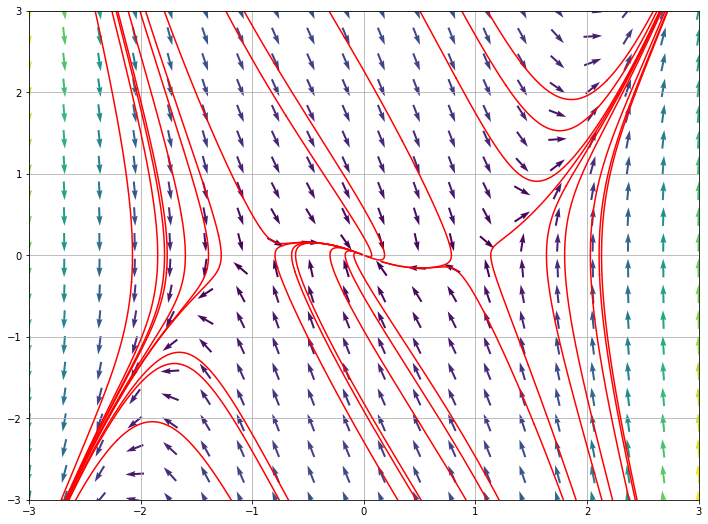

In [29]:
# mu > 1
# (0, 0) -> a stable node
# (-1, 0), (1, 0) -> an unstable saddle point

x0 = np.random.uniform(-2.5, 2.5, (30, 2))

p = {'mu': 1.2}

x1 = np.linspace(-3, 3, 20)
x2 = np.linspace(-3, 3, 20)

DEplot(duff2, (-6, 6, 1000), x0, x1, x2, p)

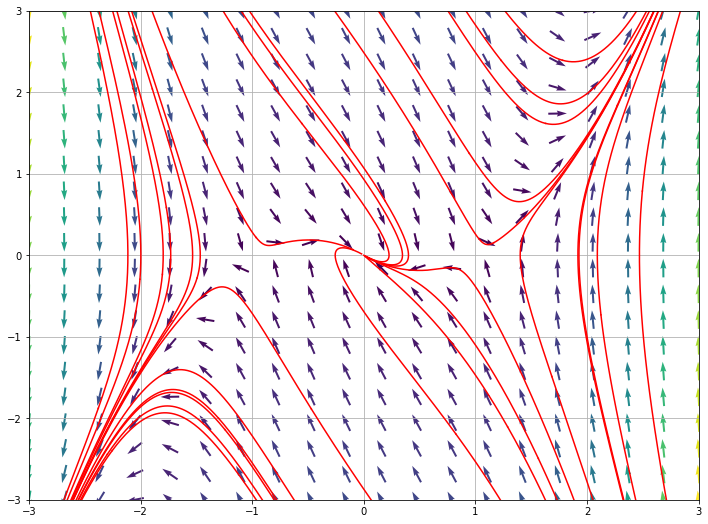

In [30]:
# mu = 1
# (0, 0) -> a stable singular node
# (-1, 0), (1, 0) -> an unstable saddle point

x0 = np.random.uniform(-2.5, 2.5, (30, 2))

p = {'mu': 1}

x1 = np.linspace(-3, 3, 20)
x2 = np.linspace(-3, 3, 20)

DEplot(duff2, (-6, 6, 1000), x0, x1, x2, p)

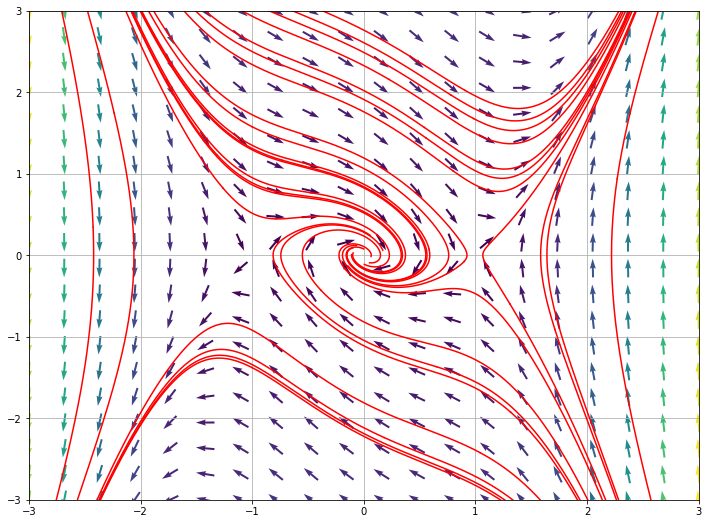

In [31]:
# 0 < mu < 1
# (0, 0) -> a stable spiral/focus
# (-1, 0), (1, 0) -> an unstable saddle point

x0 = np.random.uniform(-2.5, 2.5, (30, 2))

p = {'mu': 0.35}

x1 = np.linspace(-3, 3, 20)
x2 = np.linspace(-3, 3, 20)

DEplot(duff2, (-6, 6, 1000), x0, x1, x2, p)

### (c) 

\begin{align*}
    \begin{cases}
        \dot{x_1} &= x_2 \\
        \dot{x_2} &= -2\mu x_2 + x_1 - x_1^3
    \end{cases}
\end{align*}

Fixed points (-1, 0), (0, 0), (1, 0)

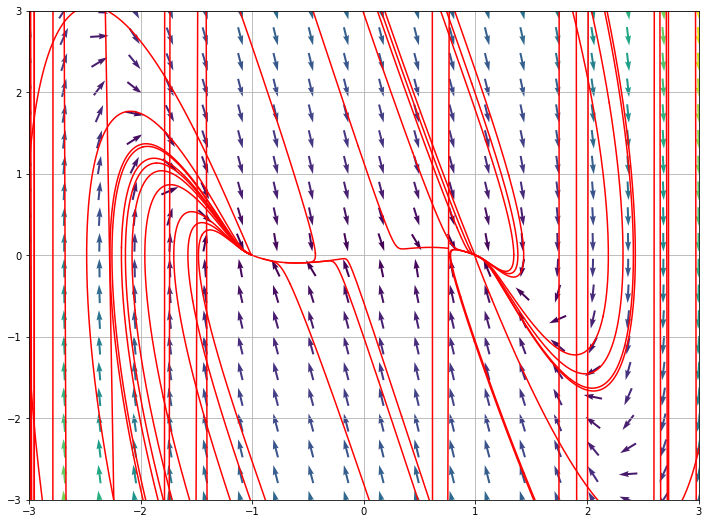

In [32]:
# mu > sqrt(2)
# (0, 0) -> an unstable saddle point 
# (-1, 0), (1, 0) -> a stable node

x0 = np.random.uniform(-2.5, 2.5, (30, 2))

p = {'mu': 2}

x1 = np.linspace(-3, 3, 20)
x2 = np.linspace(-3, 3, 20)

DEplot(duff3, (-6, 6, 1000), x0, x1, x2, p)

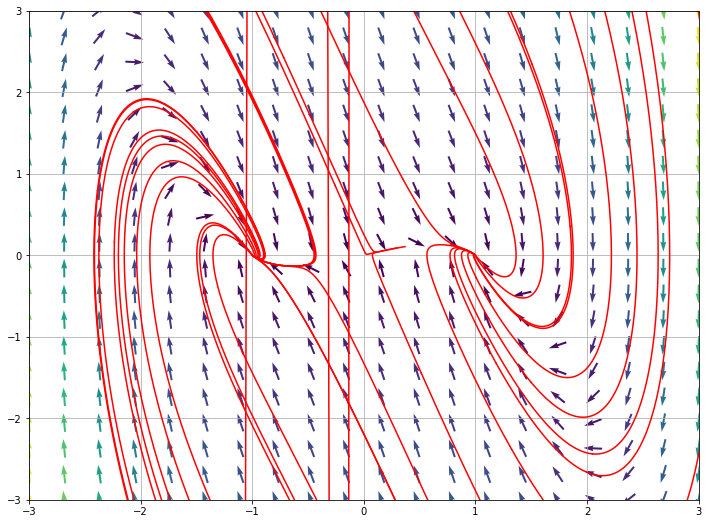

In [33]:
# mu = sqrt(2)
# (0, 0) -> an unstable saddle point 
# (-1, 0), (1, 0) -> a stable singular node

x0 = np.random.uniform(-2.5, 2.5, (30, 2))

p = {'mu': np.sqrt(2)}

x1 = np.linspace(-3, 3, 20)
x2 = np.linspace(-3, 3, 20)

DEplot(duff3, (-6, 6, 1000), x0, x1, x2, p)

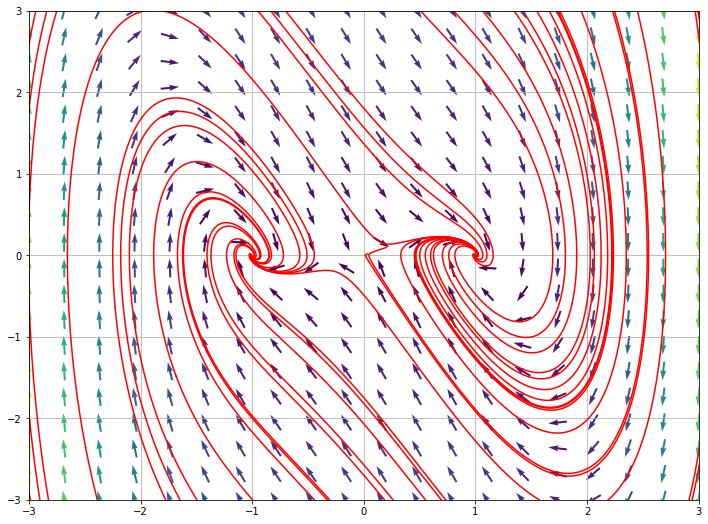

In [34]:
# 0 < mu < sqrt(2)
# (0, 0) -> an unstable saddle point 
# (-1, 0), (1, 0) -> a stable sprial/focus

x0 = np.random.uniform(-2.5, 2.5, (30, 2))

p = {'mu': 0.8}

x1 = np.linspace(-3, 3, 20)
x2 = np.linspace(-3, 3, 20)

DEplot(duff3, (-6, 6, 1000), x0, x1, x2, p)

### (d) 

\begin{align*}
    \begin{cases}
        \dot{x_1} &= x_2 \\
        \dot{x_2} &= -2\mu x_2 + x_1 + x_1^3
    \end{cases}
\end{align*}

Fixed Point (0, 0)

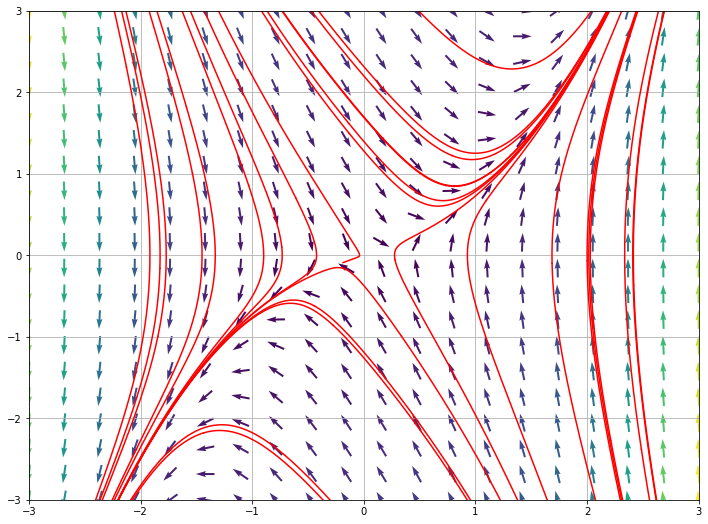

In [37]:
# An unstable saddle point 

x0 = np.random.uniform(-2.5, 2.5, (30, 2))

p = {'mu': 0.8}

x1 = np.linspace(-3, 3, 20)
x2 = np.linspace(-3, 3, 20)

DEplot(duff4, (-6, 6, 1000), x0, x1, x2, p)